In [2]:
import json

# Load Cis-BP file
cisbp_file = "./Fig2B.json"
with open(cisbp_file) as f:
    cisbp = json.load(f)

print(cisbp)

{'AP2': [0.391608, 'blosum62'], 'C2H2 ZF': [0.195804, 'identity'], 'DM': [0.924242, 'blosum62'], 'E2F': [0.958625, 'blosum62'], 'Ets': [0.937063, 'identity'], 'Forkhead': [0.27331, 'blosum62'], 'GATA': [0.370047, 'identity'], 'HSF': [1.0, 'blosum62'], 'Homeodomain': [0.561772, 'identity'], 'Myb/SANT': [0.535548, 'identity'], 'NAC/NAM': [0.434732, 'blosum62'], 'Nuclear receptor': [0.916667, 'blosum62'], 'Pipsqueak': [0.229021, 'identity'], 'RFX': [0.856643, 'blosum62'], 'SBP': [0.900932, 'blosum62'], 'Sox': [0.93648, 'identity'], 'T-box': [0.768648, 'identity'], 'Zinc cluster': [0.182401, 'identity'], 'bHLH': [0.229021, 'identity'], 'bZIP': [0.134033, 'blosum62']}


In [3]:
import pickle

# Load models file
models_file = "../models-2018/models.pickle"
with open(models_file, "rb") as f:
    models = pickle.load(f)

print(models['Keys'])
print(models['Values'])

DBD composition
{('regression approach', 'similarity representation'): (['precisions'], ['recalls'], ['Ys'], ['TF recalls'], 'recall at 75% precision', 'Y at 75% precision', 'TF recall at 75% precision', 'model')}


In [4]:
# Map Cis-BP DBDs to Pfam DBD combinations
cisbp2models = {
    'AP2': 'AP2',
    'C2H2 ZF': 'zf-C2H2+zf-C2H2+zf-C2H2',
    'DM': None,
    'E2F': 'E2F_TDP',
    'Ets': 'Ets',
    'Forkhead': 'Forkhead',
    'GATA': 'GATA',
    'HSF': 'HSF_DNA-bind',
    'Homeodomain': 'Homeodomain',
    'Myb/SANT': 'Myb_DNA-binding',
    'NAC/NAM': 'NAM',
    'Nuclear receptor': 'zf-C4',
    'Pipsqueak': None,
    'RFX': 'RFX_DNA_binding',
    'SBP': 'SBP',
    'Sox': 'HMG_box',
    'T-box': 'T-box',
    'Zinc cluster': 'Zn_clus',
    'bHLH': 'HLH',
    'bZIP': 'bZIP_1'
}

In [5]:
import pandas as pd 

# Initialize
rows = []
labels = ["DBD", "Cis-BP", "Cis-BP similarity", "JASPAR", "JASPAR regression", "JASPAR similarity", "% TFs"]

# For each DBD...
for DBD in sorted(cisbp2models):
    # Skip unmapped Cis-BP DBDs   
    if not cisbp2models[DBD]:
        continue
    # Get recalls at 75% precision
    recalls = []
    for i in models[cisbp2models[DBD]]:
        recalls.append((models[cisbp2models[DBD]][i][4], i, int(round(models[cisbp2models[DBD]][i][6] * 100))))
    # Sort
    recalls.sort(key=lambda x: x[0], reverse=True)
    # Append row to rows
    row = [DBD, cisbp[DBD][0], cisbp[DBD][1], recalls[0][0], recalls[0][1][0], recalls[0][1][1], recalls[0][2]]
    rows.append(row)

# Create (and visualize) data frame
df = pd.DataFrame(data=rows, columns=labels)
df

,DBD,Cis-BP,Cis-BP similarity,JASPAR,JASPAR regression,JASPAR similarity,% TFs
0,AP2,0.391608,blosum62,0.444656,linear,blosum62,92
1,C2H2 ZF,0.195804,identity,1.000000,logistic,blosum62,80
2,E2F,0.958625,blosum62,1.000000,linear,identity,100
3,Ets,0.937063,identity,0.847390,linear,blosum62,100
4,Forkhead,0.273310,blosum62,0.892256,logistic,blosum62,94
5,GATA,0.370047,identity,0.900000,linear,blosum62,84
6,HSF,1.000000,blosum62,1.000000,linear,identity,71
7,Homeodomain,0.561772,identity,0.013249,logistic,identity,32
8,Myb/SANT,0.535548,identity,0.929204,linear,identity,92
9,NAC/NAM,0.434732,blosum62,1.000000,linear,identity,67


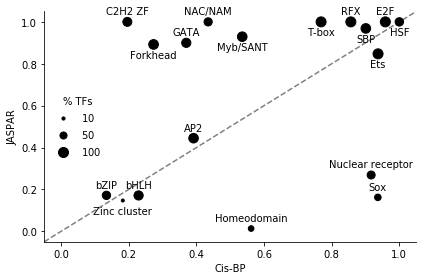

In [51]:
import matplotlib
import matplotlib.pyplot as plt

# Plot parameters
fig = plt.figure(1, tight_layout=True)
ax = fig.add_subplot(111)

# Get values
x = df["Cis-BP"].to_list()
y = df["JASPAR"].to_list()
sizes = df["% TFs"].to_list()

# Plot diagonal
ax.plot([-0.05, 1.05], [-0.05, 1.05], c="gray", ls="--", zorder=1)
scatter = ax.scatter(x, y, s=sizes, c="black", zorder=2)

# Plot legend with sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes")
ax.legend([handles[0], handles[4], handles[9]], [labels[0], labels[4], labels[9]],
          title="% TFs", frameon=False, loc='center left')

# Add labels
for i, DBD in enumerate(df["DBD"].to_list()):
    # Special cases
    extra_x = .0
    extra_y = .05
    #print(handles[i]._markersize)
    #break
    ha='center'
    va='center'
    if DBD in ["Ets", "Forkhead", "HSF", "Myb/SANT", "SBP", "T-box", "Zinc cluster"]:
        extra_y = -.05
    ax.annotate(DBD, (x[i]+extra_x, y[i]+extra_y), ha=ha, va=va)


# Set x,y axis names
plt.xlabel("Cis-BP")
plt.ylabel("JASPAR")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set plot limits between 0 and 1.05
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)

# Set aspect ratio
#x0, x1 = ax.get_xlim()
#y0, y1 = ax.get_ylim()
#ax.set_aspect((x1 - x0) / (y1 - y0))

plt.show()